# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [382]:
import pandas as pd
import numpy as np

In [383]:
petrol=pd.read_csv('petrol.csv')
petrol.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [384]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [385]:
#sorted(petrol)


def reject_outliers_iqr(petrol):
    q1, q3 = np.percentile(petrol, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((petrol > upper_bound) > (petrol < lower_bound))

In [386]:
print("The Value of q1 is:=", q1,"The value of q3 is:=",q3,"The value of iqr is:=",iqr)

The Value of q1 is:= 7.0 The value of q3 is:= 4054.5 The value of iqr is:= 4047.5


In [387]:
petrol.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


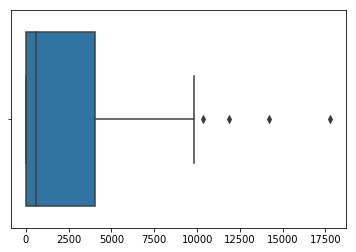

In [388]:
import seaborn as sns
sns.boxplot(petrol)

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


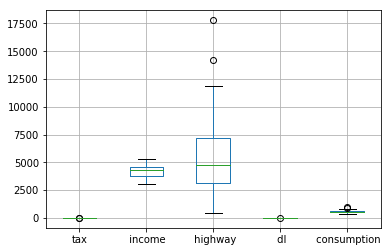

In [389]:
petrol.plot.box(grid='True')

In [390]:
q1, q3= np.percentile(petrol,[25,75])
print("The value of q1 is:=",q1 ,"The value of q3 is:=",q3)

The value of q1 is:= 7.0 The value of q3 is:= 4054.5


In [391]:
iqr = q3 - q1
print("The value of iqr is:=",iqr)

The value of iqr is:= 4047.5


In [392]:
minimum_cap = q1 -(1.5 * iqr) 
max_cap = q3 +(1.5 * iqr)
print("The minimum_cap is:=", minimum_cap,"The maximum cap is:=", max_cap)

The minimum_cap is:= -6064.25 The maximum cap is:= 10125.75


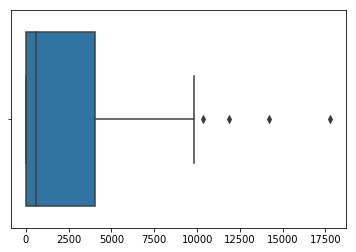

In [393]:
import seaborn as sns
sns.boxplot(petrol)

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


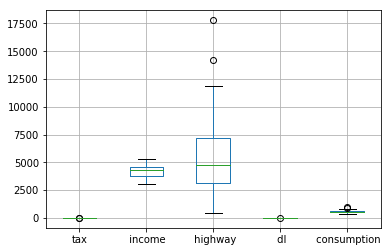

In [394]:
petrol.plot.box(grid='True')

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

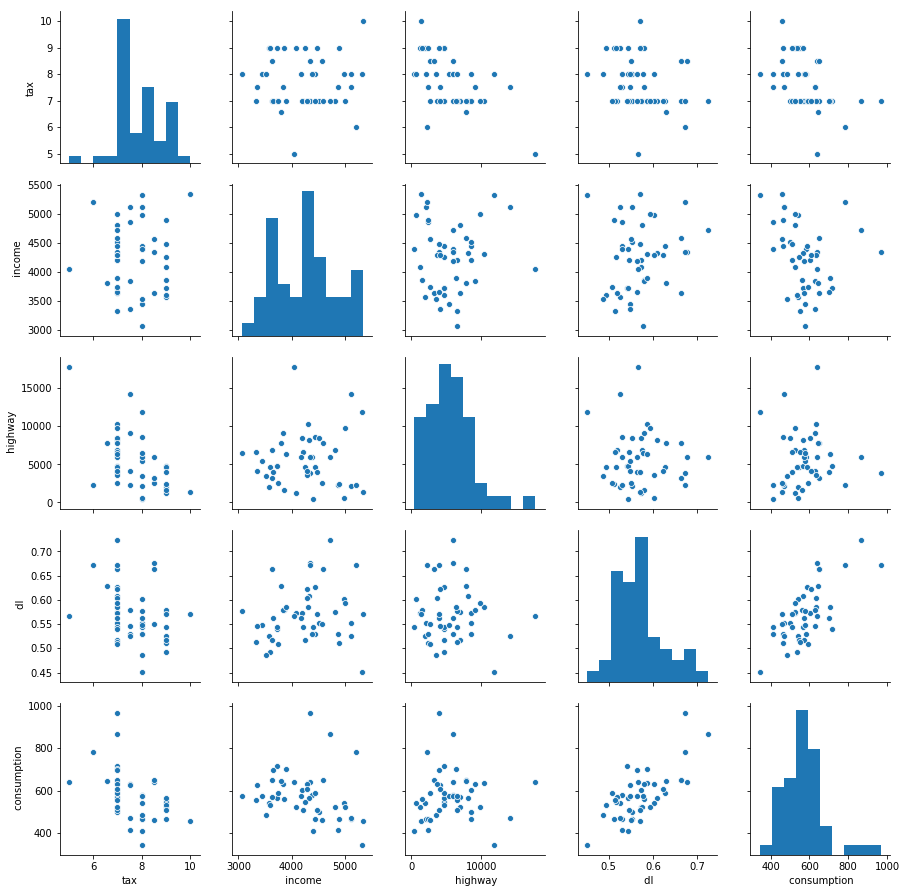

In [395]:
import seaborn as sns
sns.pairplot(petrol)

In [396]:
corr = petrol.corr()
corr


,tax,income,highway,dl,consumption
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highway,-0.522130,0.050163,1.000000,-0.064129,0.019042
dl,-0.288037,0.157070,-0.064129,1.000000,0.698965
consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


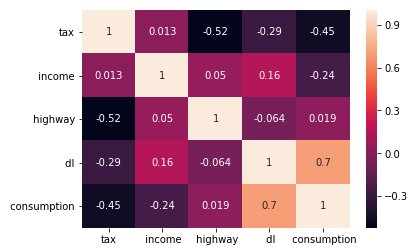

In [397]:
sns.heatmap(corr, annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [398]:
data=petrol.values# convert the data frame to a numpy array
print(type(data))
print(data)

<class 'numpy.ndarray'>
[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01 5.4100e+02]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01 5.2400e+02]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01 5.6100e+02]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01 4.1400e+02]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01 4.1000e+02]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01 4.5700e+02]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01 3.4400e+02]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01 4.6700e+02]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01 4.6400e+02]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01 4.9800e+02]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01 5.8000e+02]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01 4.7100e+02]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01 5.2500e+02]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01 5.0800e+02]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01 5.6600e+02]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01 6.3500e+02]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01 6.

In [399]:
print(data.shape)
data=data[:,1:]
print(data.shape)

(48, 5)
(48, 4)


In [400]:
#remove the features and target
X_data=data[:,2:3]#all frist 13 column, with all rows 
Y_data=data[:,3]# last column, with all rows

In [401]:
print(X_data.shape)
print(X_data)

(48, 1)
[[0.525]
 [0.572]
 [0.58 ]
 [0.529]
 [0.544]
 [0.571]
 [0.451]
 [0.553]
 [0.529]
 [0.552]
 [0.53 ]
 [0.525]
 [0.574]
 [0.545]
 [0.608]
 [0.586]
 [0.572]
 [0.54 ]
 [0.724]
 [0.677]
 [0.663]
 [0.602]
 [0.511]
 [0.517]
 [0.551]
 [0.544]
 [0.548]
 [0.579]
 [0.563]
 [0.493]
 [0.518]
 [0.513]
 [0.578]
 [0.547]
 [0.487]
 [0.629]
 [0.566]
 [0.586]
 [0.663]
 [0.672]
 [0.626]
 [0.563]
 [0.603]
 [0.508]
 [0.672]
 [0.571]
 [0.623]
 [0.593]]


In [402]:
print(Y_data.shape)
print(Y_data)

(48,)
[541. 524. 561. 414. 410. 457. 344. 467. 464. 498. 580. 471. 525. 508.
 566. 635. 603. 714. 865. 640. 649. 540. 464. 547. 460. 566. 577. 631.
 574. 534. 571. 554. 577. 628. 487. 644. 640. 704. 648. 968. 587. 699.
 632. 591. 782. 510. 610. 524.]


In [403]:

type(Y)

numpy.ndarray

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [404]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [405]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38, 1)
(38,)
(10, 1)
(10,)


Question 6 - Build Model
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [406]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

In [407]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [408]:
print("the coefficients of the multilinear regression model:=",regressor.coef_) 


the coefficients of the multilinear regression model:= [1306.11540851]


In [409]:
print("the intercept of the multilinear regression model:=",regressor.intercept_) 

the intercept of the multilinear regression model:= -180.78221511498168


In [410]:
p=regressor.intercept_
q=regressor.coef_

In [411]:
# the model of the multilinear regression model
y=p*X_train+q
print("the model of the multilinear regression model:=",y)

the model of the multilinear regression model:= [[1201.26172374]
 [1207.76988349]
 [1204.3350214 ]
 [1186.25679989]
 [1202.88876368]
 [1201.62328817]
 [1184.62975995]
 [1186.25679989]
 [1175.22908477]
 [1207.04675463]
 [1210.3008345 ]
 [1192.94574185]
 [1207.76988349]
 [1212.65100329]
 [1204.3350214 ]
 [1207.58910127]
 [1202.70798146]
 [1211.20474557]
 [1211.20474557]
 [1216.98977646]
 [1206.50440798]
 [1210.48161671]
 [1202.88876368]
 [1206.14284355]
 [1200.17703045]
 [1212.47022108]
 [1203.79267475]
 [1202.70798146]
 [1207.22753684]
 [1206.32362577]
 [1213.73569659]
 [1202.34641703]
 [1201.44250596]
 [1198.91155495]
 [1192.4033952 ]
 [1183.72584888]
 [1197.28451501]
 [1210.48161671]]


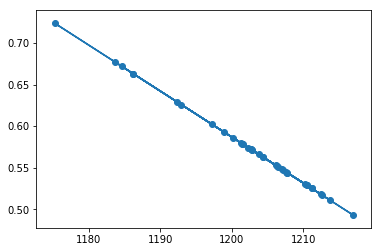

In [412]:
import matplotlib.pyplot as plt
plt.plot(y,X_train,)
plt.scatter(y,X_train)

# R-Square 

In [413]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [414]:
print(rmse)

116.78023029596234


# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [415]:
regressor.score(X_train,y_train)

0.4933125319043852

In [416]:

regressor.score(X_test,y_test)

0.41066484240625495

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [417]:
X_data=data[:,0:2]#all frist 13 column, with all rows 
Y_data=data[:,3]# last column, with all rows



In [418]:
print(X_data.shape)
print(X_data)

(48, 2)
[[ 3571.  1976.]
 [ 4092.  1250.]
 [ 3865.  1586.]
 [ 4870.  2351.]
 [ 4399.   431.]
 [ 5342.  1333.]
 [ 5319. 11868.]
 [ 5126.  2138.]
 [ 4447.  8577.]
 [ 4512.  8507.]
 [ 4391.  5939.]
 [ 5126. 14186.]
 [ 4817.  6930.]
 [ 4207.  6580.]
 [ 4332.  8159.]
 [ 4318. 10340.]
 [ 4206.  8508.]
 [ 3718.  4725.]
 [ 4716.  5915.]
 [ 4341.  6010.]
 [ 4593.  7834.]
 [ 4983.   602.]
 [ 4897.  2449.]
 [ 4258.  4686.]
 [ 4574.  2619.]
 [ 3721.  4746.]
 [ 3448.  5399.]
 [ 3846.  9061.]
 [ 4188.  5975.]
 [ 3601.  4650.]
 [ 3640.  6905.]
 [ 3333.  6594.]
 [ 3063.  6524.]
 [ 3357.  4121.]
 [ 3528.  3495.]
 [ 3802.  7834.]
 [ 4045. 17782.]
 [ 3897.  6385.]
 [ 3635.  3274.]
 [ 4345.  3905.]
 [ 4449.  4639.]
 [ 3656.  3985.]
 [ 4300.  3635.]
 [ 3745.  2611.]
 [ 5215.  2302.]
 [ 4476.  3942.]
 [ 4296.  4083.]
 [ 5002.  9794.]]


In [419]:
print(Y_data.shape)
print(Y_data)

(48,)
[541. 524. 561. 414. 410. 457. 344. 467. 464. 498. 580. 471. 525. 508.
 566. 635. 603. 714. 865. 640. 649. 540. 464. 547. 460. 566. 577. 631.
 574. 534. 571. 554. 577. 628. 487. 644. 640. 704. 648. 968. 587. 699.
 632. 591. 782. 510. 610. 524.]


In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [421]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38, 2)
(38,)
(10, 2)
(10,)


In [422]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 

# Question 9: Print the coefficients of the multilinear regression model

In [423]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [424]:
print("the coefficients of the multilinear regression model:=",regressor.coef_)

the coefficients of the multilinear regression model:= [-0.06784532  0.0032607 ]


In [425]:
print("the intercept of the multilinear regression model:=",regressor.intercept_) 

the intercept of the multilinear regression model:= 831.2887147751293


In [426]:
C=regressor.intercept_
d=regressor.coef_

In [427]:
# the model of the multilinear regression model
y=c*X_train+d
print("the model of the multilinear regression model:=",y)

the model of the multilinear regression model:= [[18740066.82917439 24199197.74587155]
 [18360165.44525814 18188429.27431982]
 [24542670.1588542  30782420.35757106]
 [27680759.67257341 61762597.59665976]
 [22591121.95380494 31276812.56951687]
 [17943835.16151429 28097090.02742328]
 [25484617.42582464 12744910.81436908]
 [23902562.34759804 40769143.03887649]
 [19348949.86914976 24589507.3868814 ]
 [20015078.32313991 47154608.76579767]
 [27800454.62914977  6937103.35614247]
 [26031050.92323844 50969234.99060063]
 [22377752.68338622 18917007.27087155]
 [25932172.48084927  3132885.38843311]
 [21794890.28614484 31094668.07037894]
 [15940245.67099705 33951734.64257106]
 [19364562.25479016 24698794.08636416]
 [22544284.79688375 42460484.81658585]
 [19026293.89924828 20738452.26225086]
 [21050699.90395272 92539813.82242332]
 [23293679.30762267 20514674.73473854]
 [23142759.57976553 44635810.54914743]
 [25068287.1420808  36064610.83257107]
 [19786096.6670808  40769143.03887649]
 [26676362.86304

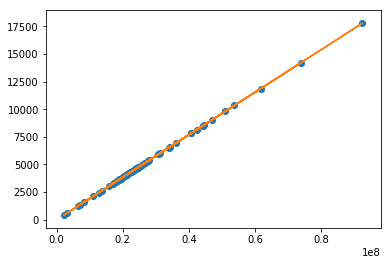

In [428]:
import matplotlib.pyplot as plt
plt.plot(y,X_train,)
plt.scatter(y,X_train)

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [429]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [430]:
print(rmse)

171.58529738380105


*R squared value increase if we increase the number of independent variables to our analysis